In [ ]:
import os
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn import preprocessing

# a)	
(10 points) Load the data. Then, explore the data by reporting summary statistics and a correlation matrix. Show your code.




## Load Data

In [ ]:
# import from url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
df = pd.read_csv('temp.csv', sep=',', header=None)

# set columns and index
df.columns = ['case_id', 'type'] + ['a' + str(x) for x in range(1,31)]
df.set_index ('case_id', inplace=True, drop=True) 

# split into X and y
target = 'type'
target_names = df[target].unique()
X = df.drop(target, axis=1).copy()
y = df[target].copy()

In [ ]:
# data
df.head()

,type,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
case_id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# data dimensions
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    569 non-null    object 
 1   a1      569 non-null    float64
 2   a2      569 non-null    float64
 3   a3      569 non-null    float64
 4   a4      569 non-null    float64
 5   a5      569 non-null    float64
 6   a6      569 non-null    float64
 7   a7      569 non-null    float64
 8   a8      569 non-null    float64
 9   a9      569 non-null    float64
 10  a10     569 non-null    float64
 11  a11     569 non-null    float64
 12  a12     569 non-null    float64
 13  a13     569 non-null    float64
 14  a14     569 non-null    float64
 15  a15     569 non-null    float64
 16  a16     569 non-null    float64
 17  a17     569 non-null    float64
 18  a18     569 non-null    float64
 19  a19     569 non-null    float64
 20  a20     569 non-null    float64
 21  a21     569 non-null    float64


## Report Summary Statistics

In [ ]:
# count of each type
summary_df = pd.concat(
    {'counts': y.value_counts(),
     'percent': y.value_counts(normalize=True).multiply(100).round(2)}, 
    axis=1)
print(summary_df)

   counts  percent
B     357    62.74
M     212    37.26


Let's look at a boxplot for each attriubte 

In [ ]:
# basic summary statistics through the `describe()`
X.describe().T

,count,mean,std,min,25%,50%,75%,max
a1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
a2,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
a3,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
a4,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
a5,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
a6,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
a7,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
a8,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
a9,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
a10,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Correlation Matrix

In [ ]:
# correlation matrix
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
a1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
a2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
a3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
a4,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
a5,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
a6,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
a7,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
a8,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
a9,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
a10,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# b)	
(12 points) Perform a predictive modeling analysis on this dataset to predict the type (benign B or malignant M) using a k-NN technique (for k=3) and the Logistic Regression technique. Please be specific about what other parameters you specified for your models. Briefly discuss your modeling process (e.g., validation technique, any preprocessing steps, parameters used to build the models, etc.) and show your code. Report the estimated coefficients of the Logistic Regression technique.

## Train Test Split


In [ ]:
# train test split
random_state = 42

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, 
    y, 
    test_size=.2,
    random_state=random_state,
    stratify=y)

## Feature Engineering

In [ ]:
# scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Modeling

### k-NN

In [ ]:
# knn with k=3
knn = neighbors.KNeighborsClassifier(
    n_neighbors=3,
    p=2,                     
    metric='minkowski',
    n_jobs=-1,               
    weights='uniform') # also considered 'distance'       

knn = knn.fit(X_train_std, y_train)

knn_y_pred = knn.predict(X_test_std)
knn_y_pred_insample = knn.predict(X_train_std)

### Logistic Regression

In [ ]:
# logistic regression
lm = linear_model.LogisticRegression(
    penalty='l2', # also considered 'l1'(with 'saga' solver)
    C=10,
    solver = 'lbfgs', # also considered 'saga' and 'liblinear'
    max_iter=1000,
    random_state=random_state)

lm = lm.fit(X_train_std, y_train)

lm_y_pred = lm.predict(X_test_std)
lm_y_pred_insample = lm.predict(X_train_std)

print('The weights of the attributes are: \n', lm.coef_)
print('The weights of the intercept is:', lm.intercept_)

The weights of the attributes are: 
 [[-0.15835869  0.14690736  0.01190569  0.46455713  0.89479523 -2.44247413
   1.77908538  2.40564987 -0.8724245   0.85155334  3.34476529 -1.5275141
   1.59966773  2.57479252  0.46305418 -1.75384666 -1.30561511  2.19415439
  -1.38911321 -1.19673001  1.19922465  3.23530106  0.74141092  1.87641531
  -0.16163329 -0.76902306  2.56933157  0.36624157  2.54995708  0.17330165]]
The weights of the intercept is: [0.66649367]


## Modeling Process

**Validation technique**  
For our validation technique, we performed a standard train-test split with a test size of 20%, a random state of 42, and we stratified the data.

**Preprocessing steps**  
For the k-NN model, we applied a min-max scalar to our data to since k-NN is fundamentally a distance-based model, meaning differences in scale matter a lot.

For the logistic regression model, we also applied a min-max scalar. This kind of scaling is not *required* for logistic regression, though it is useful in this case as it allows our solver to converge.

**Parameters**  
For the k-NN model, we utilized a 3NN model. We used a 'minkowski' metric with p=2, meaning it utilized euclidean distance. We used 'uniform' to weight our kNN. Finally, n_jobs=-1 allowed for parallelization in fitting.  

For the logistic regression model, we used specified a big C value (1e5) to increase the strength of our regularization (using the default 'L2' regularization). We used the 'lbfgs' solver with max_iter set to 1000 to ensure convergence. Finally, we set random_state to 42 to ensure reproducibility.

# c)	
(13 points) Compare the generalization performance of the k-NN model with the Logistic Regression model. Make sure you report the confusion matrix, the predictive accuracy, precision, recall, and f-measure. Briefly discuss the results and show your code.

In [ ]:
def evaluate_generalization_performance(y_pred, y_pred_insample, y_test, y_train, target_names=target_names):
  '''evaluate generalization performance for in-sample and out-of-sample predictions'''
  sig_fig = 6
  # in-sample
  print("In-sample")
  print('Accuracy:  {}'.format(round(metrics.accuracy_score(y_train, y_pred_insample), sig_fig)))
  print('Precision: {}'.format(round(metrics.precision_score(y_train, y_pred_insample, pos_label='M'), sig_fig)))
  print('Recall:    {}'.format(round(metrics.recall_score(y_train, y_pred_insample, pos_label='M'), sig_fig)))
  print('F-measure: {}'.format(round(metrics.f1_score(y_train, y_pred_insample, pos_label='M'), sig_fig)))
  print("")

  # out-of-sample
  print("Out-of-sample")
  print('Accuracy:  {}'.format(round(metrics.accuracy_score(y_test, y_pred), sig_fig)))
  print('Precision: {}'.format(round(metrics.precision_score(y_test, y_pred, pos_label='M'), sig_fig)))
  print('Recall:    {}'.format(round(metrics.recall_score(y_test, y_pred, pos_label='M'), sig_fig)))
  print('F-measure: {}'.format(round(metrics.f1_score(y_test, y_pred, pos_label='M'), sig_fig)))
  print("")

  # classification report
  print("Classification report (out-of-sample):")
  print(metrics.classification_report(y_test, y_pred, target_names=target_names))  

  # confusion matrix
  cm = metrics.confusion_matrix(y_test, y_pred, labels=target_names)
  cmd = metrics.ConfusionMatrixDisplay(cm, display_labels=target_names)
  cmd.plot(cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.show()


## Evaluation

### k-NN Evaluation

In-sample
Accuracy:  0.984615
Precision: 1.0
Recall:    0.958824
F-measure: 0.978979

Out-of-sample
Accuracy:  0.938596
Precision: 0.972973
Recall:    0.857143
F-measure: 0.911392

Classification report (out-of-sample):
              precision    recall  f1-score   support

           M       0.92      0.99      0.95        72
           B       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



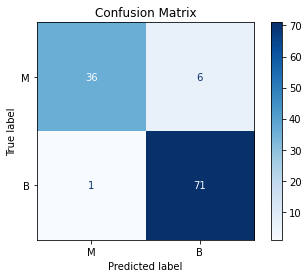

In [ ]:
evaluate_generalization_performance(knn_y_pred, knn_y_pred_insample, y_test, y_train)

### Logistic Regression Evaluation

In-sample
Accuracy:  0.989011
Precision: 0.994012
Recall:    0.976471
F-measure: 0.985163

Out-of-sample
Accuracy:  0.973684
Precision: 0.97561
Recall:    0.952381
F-measure: 0.963855

Classification report (out-of-sample):
              precision    recall  f1-score   support

           M       0.97      0.99      0.98        72
           B       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



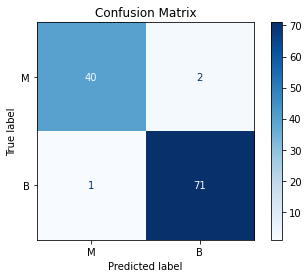

In [ ]:
evaluate_generalization_performance(lm_y_pred, lm_y_pred_insample, y_test, y_train)

## Evaluation Discussion
**In-sample Performance**  
For both our models, we saw near-perfect in-sample performance, a potential indicator of overfitting. This could be due to either multicollinearity or data leakage.   

The correlation chart above indicates that certain variables are highly correlated with one another. We experimented with 'l1' regularization and a 'saga' solver. L1 (Lasso) regularization implicitly performs feature selection, which should account for multicollinearity. We saw only a tiny change to performance (for example, 100% to ~99% accuracy) after fitting with 'l1' regularization. We did, however, see a large change when we changed the solver to "liblinear", however this does not necessarily solve multicollinearity.

The issue of data leakage can be demonstrated by the difference in the "weights" parameter between "uniform" and "distance" for our k-NN. Since k is small, our in-sample prediction is able to assign a large amount of weight to the 1 of the 3 nearest data points from the training set that is the same as the is being predicted. When we changed it to "uniform", we saw the in-sample accuracy go from 100% to ~98% but the out-of-sample performance improved by a large amount.  

We have not addressed automated feature selection in class beyond "l1" regularization, and for the purposes of this assignment we will hold-off on conducting it further.

**Out-of-sample Performance**  
Our out-of-sample performance suggest that our model performance is very good across the metrics consider (accuracy, precision, recall, and f1-score).  

Our logistic regression model performs better in terms of accuracy, precision, recall and f-measure.

# d)	
(15 points) What generalization performance metric would you prefer to use in order to choose the best performing model in this context and why? Please be clear about any assumptions you might make when you choose the generalization performance metric you would prefer.


## Preferred Generalization Performance Metric
We would use **recall** as the generalization performance metric to choose the best performing model. This is becauses recall minimizes the chance of a **false negative**, which is when we predict benign (B) when the cancer is actually malignant (M).

Since a cancer diagnosis is a matter of life and death, we want to minimize false negatives whenever possible (as further testing is much preferred to a patient's death). Our logistic regression model has the higher recall, therefore we would select this model.